# Exploramos los datos

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

PATH = Path('/content/gdrive/My Drive/ml-practico/data')

In [2]:
list(PATH.glob('*'))

[PosixPath('../data/aclImdb_v1.tar'),
 PosixPath('../data/title.ratings.tsv'),
 PosixPath('../data/movie_gross.csv'),
 PosixPath('../data/title.principals.tsv'),
 PosixPath('../data/title.akas.tsv'),
 PosixPath('../data/name.basics.tsv'),
 PosixPath('../data/title.basics.tsv'),
 PosixPath('../data/title.crew.tsv')]

# Arrancamos por title basics

Ver documentacion de columnas [aca](https://www.imdb.com/interfaces/)

In [3]:
import pandas as pd

title_basics = pd.read_csv(PATH / 'title.basics.tsv', sep='\t')
len(title_basics)

/Users/przivic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


7156880

Nos está diciendo que tenemos columnas con tipos mezclados (por ejemplo numero y string).

Eso hace que la columa se interprete como string (se muestra como object en pandas)

In [4]:
title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

# A ver algunas rows

In [5]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


## titleType

In [6]:
title_basics.titleType.value_counts()

tvEpisode       5139923
short            760240
movie            560818
video            278137
tvSeries         192100
tvMovie          123363
tvMiniSeries      33232
tvSpecial         29616
videoGame         26291
tvShort           13160
Name: titleType, dtype: int64

**Descartamos las series** (no aplican para lo que estamos trabajando ahora)

In [7]:
title_basics = title_basics[
    # Dejamos tvSpecial, video y tvMovie por ahora, vamos a ver de que se tratan
    ~title_basics.titleType.isin(['tvEpisode', 'tvSeries', 'tvMiniSeries', 'videoGame', 'tvShort', 'short'])
]

len(title_basics) # vemos con cuanta data nos quedamos

991934

In [8]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


## runtimeMinutes

In [9]:
# Convertimos runtimeMinutes a float. No se puede tener una columna de tipo int con NaN
title_basics.runtimeMinutes = (
    title_basics.runtimeMinutes.apply(lambda x: np.nan if x == r'\N' else x).astype(float)
)

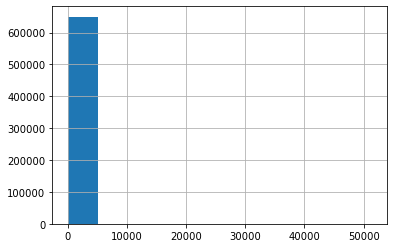

In [10]:
title_basics.runtimeMinutes.dropna().hist();

Intentamos hacer un histograma, pero no se ve nada. Parece tener algunos valores muy grandes

In [11]:
title_basics.sort_values('runtimeMinutes', ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6380342,tt8273150,movie,Logistics,Logistics,0,2012,\N,51420.0,Documentary
2166581,tt12095652,video,The Longest Video on YouTube: 596.5 Hours,The Longest Video on YouTube: 596.5 Hours,0,2011,\N,35791.0,\N
2269937,tt12277054,movie,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),0,2019,\N,28643.0,Documentary
3861714,tt2659636,movie,Modern Times Forever,Modern Times Forever,0,2011,\N,14400.0,Documentary
1943883,tt11707418,tvMovie,Svalbard Minute by Minute,Svalbard minutt for minutt,0,2020,\N,13319.0,"Adventure,Documentary"


Efectivamente hay valores enormes. runtimeMinutes = 13319 quiere decir 221 horas!!!!

**Cuantas peliculas de mas de 3 horas hay?**

In [12]:
(title_basics.runtimeMinutes > 3 * 60).sum() / len(title_basics)

0.009139720989501318

In [13]:
# Un 0.9%, a ver algunas...

title_basics[title_basics.runtimeMinutes > 3 * 60].sample(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
248799,tt0259422,movie,Mangala,Mangala,0,1951,\N,182.0,Drama
1229898,tt1045823,tvMovie,Camp MTV,Camp MTV,0,1989,\N,360.0,Comedy
6368899,tt8248986,video,World Of BangBros: BangBros Exotics 1,World Of BangBros: BangBros Exotics 1,1,2018,\N,212.0,Adult
3712781,tt2354169,tvMovie,Le nozze di Figaro,Le nozze di Figaro,0,1996,\N,187.0,Music
3969055,tt2913840,video,Lez-Mania,Lez-Mania,1,2008,\N,271.0,Adult
4073289,tt3163900,video,Interracial Gangbang,Interracial Gangbang,1,2012,\N,224.0,Adult
4867703,tt4962920,video,August Ames and Friends,August Ames and Friends,1,2014,\N,349.0,Adult
6677216,tt8906050,video,Squirtathon,Squirtathon,1,2010,\N,244.0,Adult
1154071,tt10324862,video,DocP-132,DocP-132,1,2019,\N,226.0,Adult
271592,tt0283246,tvMovie,Anatomy of Disgust,Anatomy of Disgust,0,2000,\N,195.0,"Documentary,History"


**Parece haber muchos video**

In [14]:
title_basics[title_basics.runtimeMinutes > 3 * 60].titleType.value_counts()

video        5122
movie        1999
tvMovie      1151
tvSpecial     794
Name: titleType, dtype: int64

**Pareciera que hay muchos videos, tvMovie y tvSpecial**

Por otro lado, alguna de estas estará en la base de datos de grossing? Ya que estamos, tambien podemos juntarla con la de ratings

### Merges para ver una foto mas completa

In [15]:
movie_gross = pd.read_csv(PATH / 'movie_gross.csv')

In [16]:
movie_gross.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [17]:
movie_gross.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [18]:
# No tenemos el id, pero tenemos el link
movie_gross.movie_imdb_link.head()

0    http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1    http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2    http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3    http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4    http://www.imdb.com/title/tt5289954/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

In [19]:
movie_gross['tconst'] = movie_gross.movie_imdb_link.apply(lambda x: x.split('/')[4])

In [20]:
# A priori solo nos interesa el tconst y el gross

movie_gross = movie_gross[['tconst', 'gross']]

In [21]:
movies = title_basics.merge(movie_gross, on='tconst')

In [22]:
# Checkeamos no perder datos
len(movies), len(movie_gross), len(title_basics)

(4926, 5043, 991934)

In [23]:
# Perdemos un monton!!!!

movies = title_basics.merge(movie_gross, on='tconst', how='left')

In [24]:
len(movies), len(movie_gross), len(title_basics)

(992056, 5043, 991934)

In [25]:
# Pareciera haber repetidos en movie_gross....

repeated = movie_gross.tconst.value_counts().sort_values(ascending=False).head(10)
repeated

tt3332064    3
tt2224026    3
tt0360717    3
tt0077651    3
tt1976009    3
tt0232500    3
tt2638144    3
tt0264935    2
tt0872230    2
tt0083767    2
Name: tconst, dtype: int64

In [26]:
movie_gross[movie_gross.tconst.isin(repeated.index.tolist())].sort_values('tconst').head(20)

,tconst,gross
4821,tt0077651,47000000.0
2619,tt0077651,47000000.0
2492,tt0077651,47000000.0
3370,tt0083767,NaN
430,tt0083767,NaN
100,tt0232500,144512310.0
395,tt0232500,144512310.0
1332,tt0232500,144512310.0
3654,tt0264935,31874869.0
998,tt0264935,31874869.0


In [27]:
# Pareciera que los repetidos son repetidos de verdad. Vamos a hacer un ultimo check

# Vemos la cantidad de valores distintos para "gross", para ver si hay valores diferentes
movie_gross.groupby('tconst').agg({'gross':'nunique'}).max()

gross    1
dtype: int64

In [28]:
# Vamos de deduplicar gross

movie_gross = movie_gross.groupby('tconst').gross.max().reset_index()

In [29]:
movies = title_basics.merge(movie_gross, on='tconst', how='left')

len(movies), len(title_basics), len(movie_gross)

(991934, 991934, 4919)

### Merge con ratings

In [30]:
title_ratings = pd.read_csv(PATH / 'title.ratings.tsv', sep='\t')

In [31]:
movies_wr = movies.merge(title_ratings, on='tconst')
movies_wr.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,gross,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45.0,Romance,NaN,5.9,154
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20.0,"Documentary,News,Sport",NaN,5.2,356
2,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,NaN,"Biography,Drama",NaN,6.1,41
3,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100.0,\N,NaN,3.8,6
4,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70.0,"Biography,Crime,Drama",NaN,6.1,589


In [32]:
# Checkeamos que no perdimos data en el join
len(movies_wr), len(movies), len(title_ratings)

(364335, 991934, 1071882)

In [33]:
# Perdimos un monton de datos!!!!!!
# Ademas podemos ver que hay peliculas que tienen rating pero que no figuran en title_basics
# por ahora no hacemos nada con eso...

movies_wr = movies.merge(title_ratings, on='tconst', how='left')

In [34]:
len(movies_wr), len(movies), len(title_ratings)

(991934, 991934, 1071882)

In [35]:
movies = movies_wr

## Volviendo a donde estabamos...
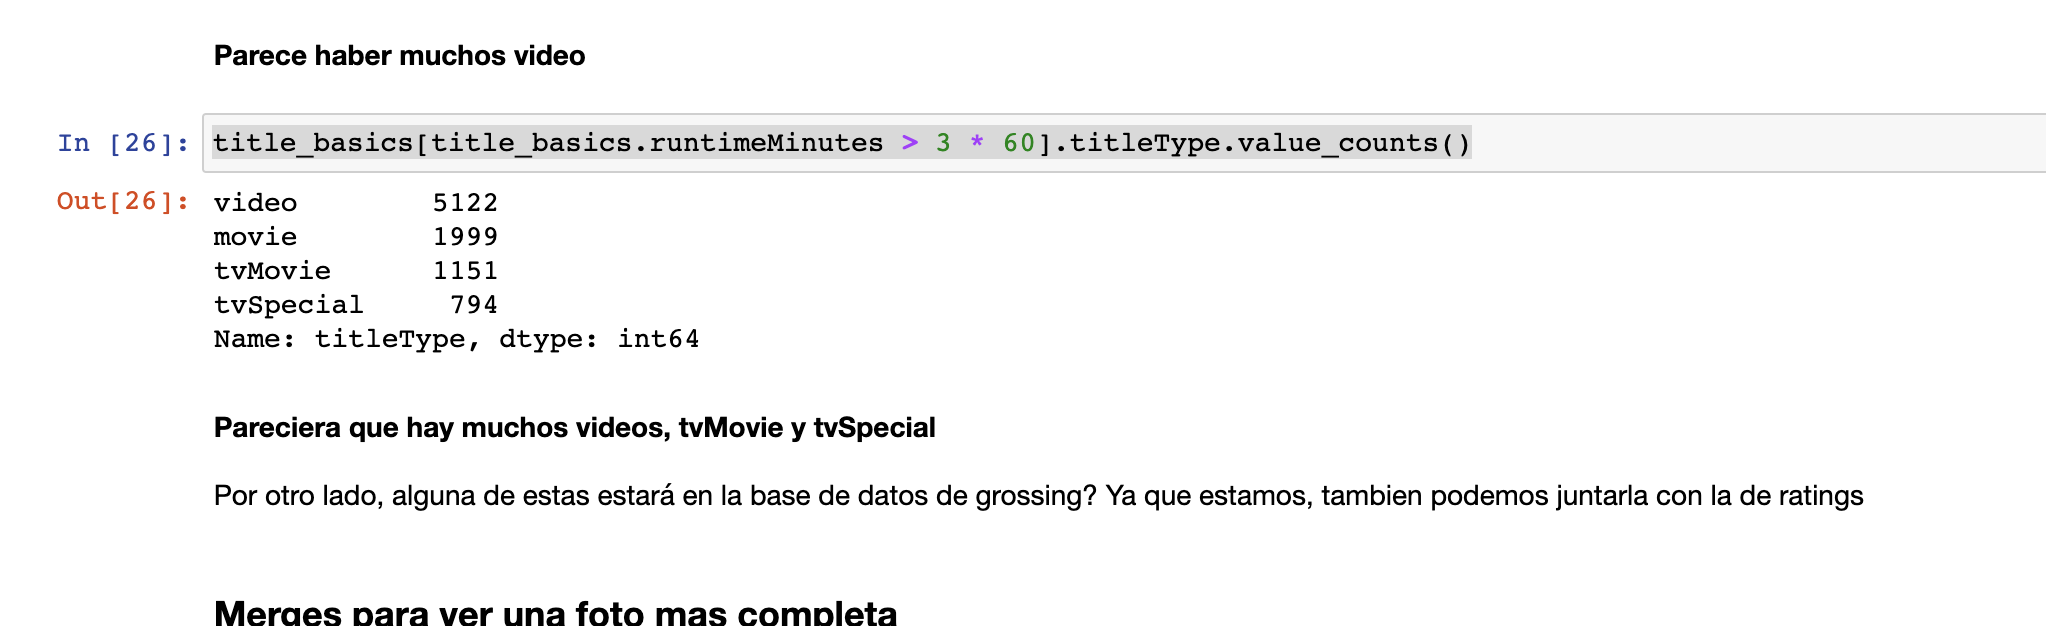

In [36]:
movies[movies.runtimeMinutes > 3 * 60].sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,gross,averageRating,numVotes
868725,tt7054670,video,The Hottest Girls in Porn,The Hottest Girls in Porn,1,2017,\N,340.0,Adult,NaN,5.4,5.0
797036,tt5625830,video,A Gonzo Story: Whorehouse Virgin,A Gonzo Story: Whorehouse Virgin,1,2016,\N,184.0,Adult,NaN,NaN,NaN
503950,tt1377817,movie,Welcome to New York,Welcome to New York,0,2005,\N,950.0,Comedy,NaN,NaN,NaN
777591,tt5236714,tvMovie,"Alcina, Georg Friedrich Haendel","Alcina, Georg Friedrich Haendel",0,2015,\N,193.0,"Drama,Horror,Musical",NaN,8.1,10.0
469253,tt12573178,video,Reumatikerförbundet fyller 70 år!,Reumatikerförbundet fyller 70 år!,0,2015,\N,266.0,"Documentary,Talk-Show",NaN,NaN,NaN
565702,tt1808299,tvSpecial,Melbourne Cup Day,Melbourne Cup Day,0,1988,\N,520.0,Sport,NaN,NaN,NaN
520331,tt1495681,video,Baby Got Boobs,Baby Got Boobs,1,2009,\N,208.0,Adult,NaN,6.5,6.0
811133,tt5903740,video,Superiority Complex,Superiority Complex,1,2016,\N,196.0,Adult,NaN,NaN,NaN
616874,tt2278998,video,Endogonidic Tragedy,Tragedia Endogonidia,0,2007,\N,341.0,Documentary,NaN,NaN,NaN
326294,tt0924443,video,Funbag Fantasies 5,Funbag Fantasies 5,1,2006,\N,240.0,Adult,NaN,NaN,NaN


**Parece haber mucho de adultos**

In [37]:
n_long_adult = movies[movies.runtimeMinutes > 3 * 60].genres.apply(lambda x: 'Adult' in x).sum()
n_long = (movies.runtimeMinutes > 3 * 60).sum()

n_long, n_long_adult, n_long_adult / n_long

(9066, 4064, 0.4482682550187514)

**Parece que no tienen data de gross**

In [38]:
movies[movies.runtimeMinutes > 3 * 60].gross.isna().sum() / n_long

0.9962497242444297

In [39]:
# idem para 2 horas
movies[movies.runtimeMinutes > 2 * 60].gross.isna().sum() / (movies.runtimeMinutes > 2 * 60).sum()

0.9847324372305352

In [40]:
movies = movies[movies.runtimeMinutes <= 2 * 60].copy()

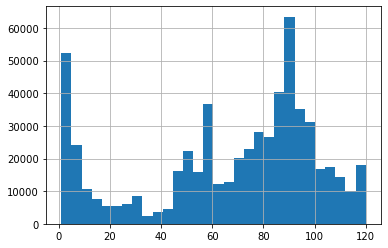

In [41]:
movies.runtimeMinutes.hist(bins=30);

Sigue habiendo duraciones muy cortas!!! 

Veamos a ver si alguna otra columna nos da una pista

## Genres

In [42]:
from itertools import chain
from collections import Counter

def parse_genres(genres):
    if isinstance(genres, float) or genres == r'\N': return ['no-genre']
    else: return genres.split(',')
    

movies['genres'] = movies.genres.apply(parse_genres)

In [43]:
Counter(chain(*movies.genres.tolist()))

Counter({'Romance': 34458,
         'Documentary': 137983,
         'News': 5521,
         'Sport': 8305,
         'no-genre': 29089,
         'Biography': 17905,
         'Crime': 28723,
         'Drama': 157279,
         'Adventure': 23924,
         'Fantasy': 12931,
         'Family': 20096,
         'War': 7212,
         'History': 14041,
         'Western': 5266,
         'Thriller': 25848,
         'Comedy': 101248,
         'Mystery': 13509,
         'Horror': 25005,
         'Action': 32379,
         'Music': 70732,
         'Sci-Fi': 9936,
         'Animation': 13507,
         'Musical': 8844,
         'Film-Noir': 762,
         'Adult': 44273,
         'Reality-TV': 1480,
         'Short': 98804,
         'Talk-Show': 1736,
         'Game-Show': 364})

**Hay varios Short, no debería!**

A ver cual es la duracion...

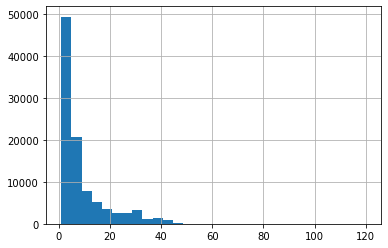

In [44]:
movies[movies.genres.apply(lambda x: 'Short' in x)].runtimeMinutes.hist(bins=30);

🚀

In [45]:
movies = movies[movies.genres.apply(lambda x: 'Short' not in x)]

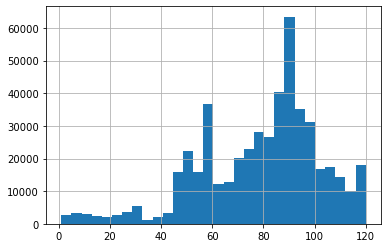

In [46]:
movies.runtimeMinutes.hist(bins=30);

In [47]:
movies[movies.runtimeMinutes < 60].titleType.value_counts()

movie        46335
tvMovie      30296
video        18805
tvSpecial     3207
Name: titleType, dtype: int64

Chau video, tvSpecial y tvMovie

In [48]:
movies = movies[~movies.titleType.isin(['video', 'tvSpecial', 'tvMovie'])]

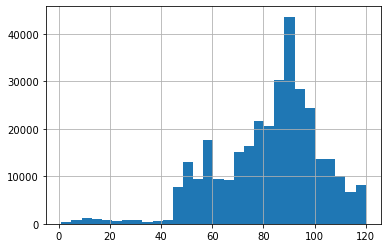

In [49]:
movies.runtimeMinutes.hist(bins=30);

## [Cuanto dura un largometraje??](https://www.google.com/search?q=cuanto+dura+un+largometraje&oq=cuanto+dura+un+largometraje&aqs=chrome..69i57.3779j0j7&sourceid=chrome&ie=UTF-8)

In [50]:
movies = movies[movies.runtimeMinutes >= 60]

Se te ocurre algun otro check para hacer??